# Convolutional Neural Networks 
* CNNs - very common model/topology for image classification problem
* Let's use MNIST again
* Original Keras tutorial is here: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.1-introduction-to-convnets.ipynb

In [1]:
!date
!hostname
!pip install --ignore-installed --upgrade tensorflow==1.8.0

import tensorflow as tf

import numpy as np

tf.enable_eager_execution()

Thu May 17 22:50:59 UTC 2018
smallDLVM1
  Using cached https://files.pythonhosted.org/packages/6d/dc/464f59597a5a8282585238e6e3a7bb3770c3c1f1dc8ee72bd5be257178ec/tensorflow-1.8.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5b/c3/9b947e301e19bea75dc8c1fd3710eed5d2b31aa13ae13d5e38e891f784cc/protobuf-3.5.2.post1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/30/e935244ca6165187ae8be876b6316ae201b71485538ffac1d718843025a9/wheel-0.31.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/61/11b05cc37ccdaabad89f04dbdc2a02905cf6de6f9b05816dba843beed328/numpy-1.14.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/91/cc9805f1ff7b49f620136b3a7ca26f6a1be2ed424606804b0fbcf499f712/astor-0.6.2-

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

train_images = np.asarray(train_images, dtype=np.float32) / 255

# Convert the train images and add channels
train_images = train_images.reshape((TRAINING_SIZE, 28, 28, 1))

test_images = np.asarray(test_images, dtype=np.float32) / 255
# Convert the train images and add channels
test_images = test_images.reshape((TEST_SIZE, 28, 28, 1))

In [4]:
# How many digits we are predicting from (0-9)
LABEL_DIMENSIONS = 10

train_labels  = tf.keras.utils.to_categorical(train_labels, LABEL_DIMENSIONS)
test_labels = tf.keras.utils.to_categorical(test_labels, LABEL_DIMENSIONS)

# Cast the labels to floats, needed later
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [7]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [8]:
BATCH_SIZE=128

# Because tf.data may work with potentially **large** collections of data
# we do not shuffle the entire dataset by default
# Instead, we maintain a buffer of SHUFFLE_SIZE elements
# and sample from there.
SHUFFLE_SIZE = 10000 

# Create the dataset
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset = dataset.shuffle(SHUFFLE_SIZE)
dataset = dataset.batch(BATCH_SIZE)

In [9]:
EPOCHS=5

for epoch in range(EPOCHS):
  for (batch, (images, labels)) in enumerate(dataset):
    train_loss, train_accuracy = model.train_on_batch(images, labels)
    
    if batch % 10 == 0: print(batch, train_accuracy.numpy())
  
  # Here you can gather any metrics or adjust your training parameters
  print('Epoch #%d\t Loss: %.6f\tAccuracy: %.6f' % (epoch + 1, train_loss, train_accuracy))

0 0.140625
10 0.0859375
20 0.0703125
30 0.1015625
40 0.1171875
50 0.078125
60 0.25
70 0.3671875
80 0.3671875
90 0.484375
100 0.46875
110 0.703125
120 0.84375
130 0.828125
140 0.8515625
150 0.875
160 0.90625
170 0.859375
180 0.9609375
190 0.9140625
200 0.9296875
210 0.9375
220 0.9453125
230 0.9453125
240 0.9453125
250 0.9296875
260 0.890625
270 0.9140625
280 0.9609375
290 0.9453125
300 0.9453125
310 0.953125
320 0.984375
330 0.984375
340 0.9609375
350 1.0
360 0.953125
370 0.9609375
380 0.96875
390 0.953125
400 0.953125
410 0.9921875
420 0.9375
430 0.96875
440 0.9609375
450 0.9765625
460 0.96875
Epoch #1	 Loss: 0.068205	Accuracy: 0.979167
0 0.9921875
10 0.953125
20 0.984375
30 0.96875
40 0.9453125
50 0.9609375
60 0.96875
70 0.953125
80 0.984375
90 0.9765625
100 0.9765625
110 0.984375
120 0.953125
130 0.984375
140 0.9765625
150 0.96875
160 0.9921875
170 0.9609375
180 0.984375
190 0.9921875
200 0.96875
210 1.0
220 0.9609375
230 0.96875
240 0.9765625
250 0.96875
260 0.96875
270 0.9921875
28

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Model \t\t Loss: %.6f\tAccuracy: %.6f' % (test_loss, test_acc))

10000/10000 [==============================] - 1s 149us/step

Test Model 		 Loss: 0.031939	Accuracy: 0.990400


9
5
6
3
8


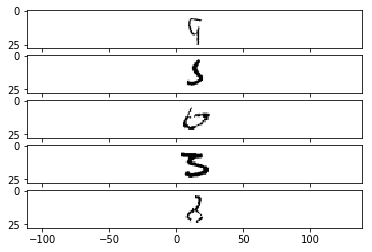

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2)
np.set_printoptions(linewidth=1000)

i=0
maxi=5

f, plot = plt.subplots(maxi, sharex=True, sharey=True)

for img, label in zip(test_images, test_labels):
    if i==maxi:
        break
    img1 = np.expand_dims(img, axis=0)
    if np.argmax(model.predict(img1)) != np.argmax(label):
        img = np.reshape(img, (28,28))
        print(np.argmax(label))
        plot[i].imshow(img, cmap="Greys")
        i+=1